# 编程帮你进行科学探究
使用Python编码，进行数据分析和可视化

## 1. 实验数据
来自于`Galton Board`实验数据，分别在三个不同的弹性碰撞系数下进行了实验，实验关键参数如下：
1. 小球数量：1500
2. 弹性碰撞设定：完全弹性碰撞，非完全弹性碰撞，完全非弹性碰撞
3. 仓室分隔数目：20

## 2. 数据基本分析
首先检验一下数据是否完整，是否合理等

In [8]:
# 加载需要使用的库
from matplotlib import pyplot as plt

In [3]:
elastic_data = [19, 15, 17, 36, 36, 79, 113, 119, 141, 156, 140, 158, 114, 98, 85, 62, 27, 36, 19, 30]
# 检验数据完整性
data_len = len(elastic_data)
if data_len == 20:
    print(f"弹性碰撞数据检验1: 仓室数量正确！共有{data_len}个仓室。")
else:
    print(f"仓室数目应为20，但实际数目为{data_len},请检查数据完整性。")

# 检验小球个数完整性：
s = 0
# for i in range(data_len):
#     s = s + elastic_data[i]
#     print(s)

for data in elastic_data:
    s = s + data
    # print(s)

if s == 1500:
    print(f"小球总数正确，共{s}个")
else:
    print(f"小球数量错误！")
    
    

弹性碰撞数据检验1: 仓室数量正确！共有20个仓室。
小球总数正确，共1500个


In [4]:
non_elastic_data = [32,27,33,50,66,69,91,115,130,134,142,126,108,100,60,75,41,32,22,47]
s = 0
for data in non_elastic_data:
    s=s+data
    print(s)
if s==1500:
    print(f"小球🪳🪳总数正确，共{s}个")
else:  
    print(f"小强数量错误🪳")

32
59
92
142
208
277
368
483
613
747
889
1015
1123
1223
1283
1358
1399
1431
1453
1500
小球🪳🪳总数正确，共1500个


In [5]:
semi_elastic_data

NameError: name 'semi_elastic_data' is not defined

In [59]:
from scipy.stats import norm
import numpy as np

$$
Gaussian = A e^{-\frac{(x-\mu)^2}{2\sigma{^2}}}
$$

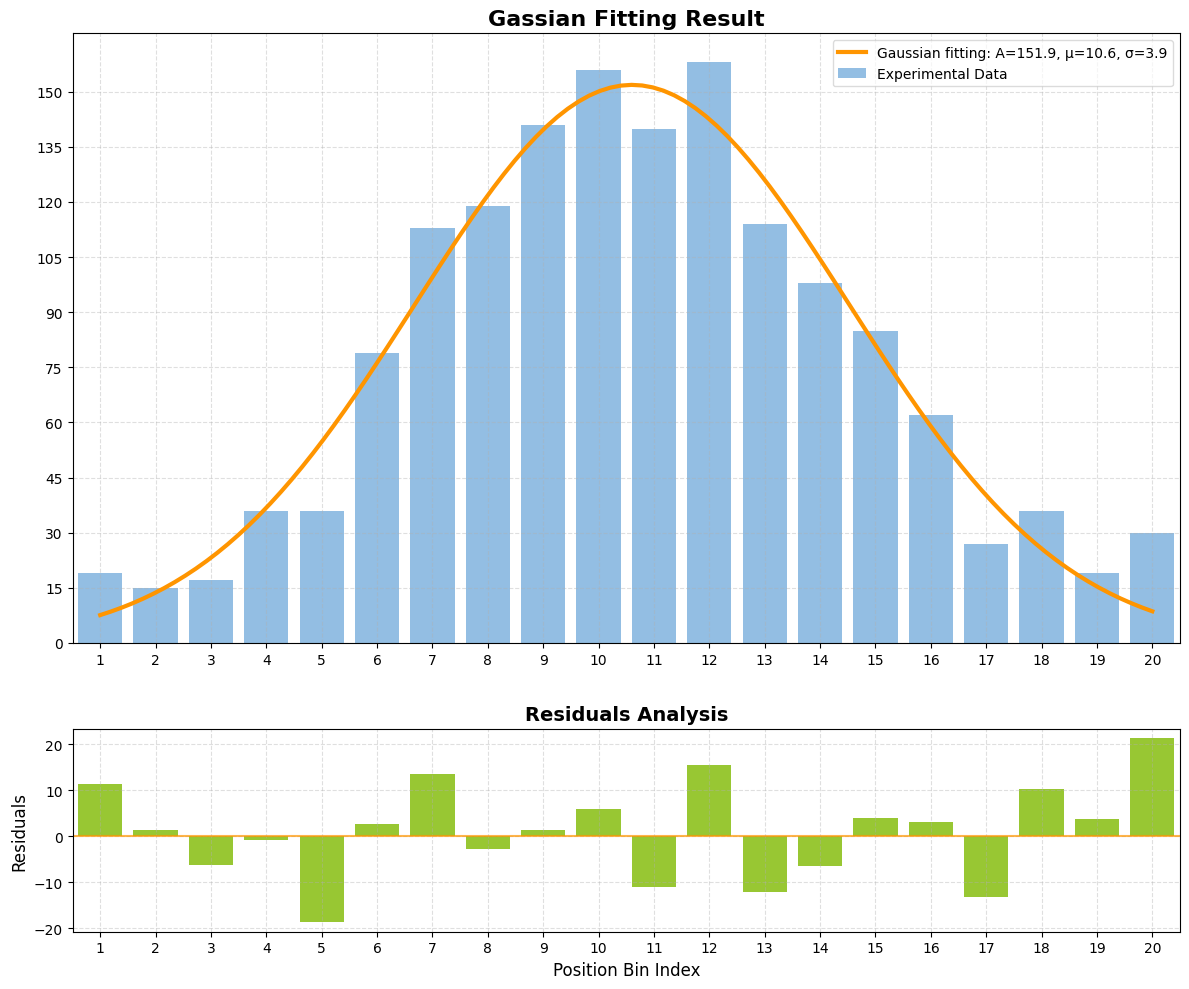

In [67]:
from scipy.optimize import curve_fit

# 确定横轴和纵轴
bin_idx = [i+1 for i in range(len(elastic_data))]
bin_value = np.array(elastic_data)

# 确定拟合所需的曲线，这里是高斯曲线
def gaussian(x, a, mu, std):
    return a * np.exp(-(x - mu)**2 / (2 * std**2))

# 使用实验数据来拟合，并获取高斯曲线的参数
params, covariance = curve_fit(gaussian, bin_idx, bin_value, p0=[100, 10, 3])
a, mu, sigma = params

# 准备绘制拟合曲线，需要生成曲线的 x,y 数据
x_fit = np.linspace(min(bin_idx), max(bin_idx), 100)
y_fit = gaussian(x_fit, a, mu, sigma)

# 需要计算残差，因此要在实验数据点上拟合值和实验值的误差
residuals = bin_value - gaussian(bin_idx, a, mu, sigma)


# 创建图形
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 10), gridspec_kw = {'height_ratios': [3,1]})
# 设置子图颜色
fig.patch.set_facecolor('#FFFFFF')
ax1.set_facecolor('#FFFFFF')
ax2.set_facecolor('#FFFFFF')

# 子图1: 拟合图
bars = ax1.bar(bin_idx, bin_value, width=0.8, alpha=0.65, label='Experimental Data', color='#5A9BD5')
ax1.plot(x_fit, y_fit, color='#FF9500', linewidth=3, label=f'Gaussian fitting: A={a:.1f}, μ={mu:.1f}, σ={sigma:.1f}')
ax1.set_xticks(np.arange(1,21,1))
ax1.set_xlim(0.5, 20.5)
ax1.set_yticks(np.arange(0, max(bin_value),15))
ax1.set_xlabel('Position', fontsize=12, color='white')
ax1.set_ylabel('Object amount', fontsize=12, color='white')
ax1.set_title('Gassian Fitting Result', fontsize=16, color='black', fontweight='bold')
ax1.legend(framealpha=0.7)
ax1.grid(True, linestyle='--', alpha=0.4)  # 使用虚线网格
ax1.tick_params(colors='black')  # 坐标轴刻度标签颜色


# 子图2：残差分析
residual_bars = ax2.bar(bin_idx, residuals, width=0.8, color='#7FBA00', alpha=0.8)  # 使用绿色
ax2.axhline(y=0, color='#FF9500', linestyle='-', alpha=0.7)
ax2.set_xticks(np.arange(1,21,1))
ax2.set_xlim(0.5, 20.5)
ax2.set_xlabel('Position Bin Index', fontsize=12, color='black')
ax2.set_ylabel('Residuals', fontsize=12, color='black')
ax2.set_title('Residuals Analysis', fontsize=14, color='black', fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.4)  # 使用虚线网格
ax2.tick_params(colors='black')  # 坐标轴刻度标签颜色

# # 在图表上显示评估指标
# metrics_text = (f"MSE: {residuals:.2f}")
# ax1.text(0.5, 0.05, metrics_text, transform=ax1.transAxes, 
#          fontsize=11, ha='center', va='center', 
#          bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

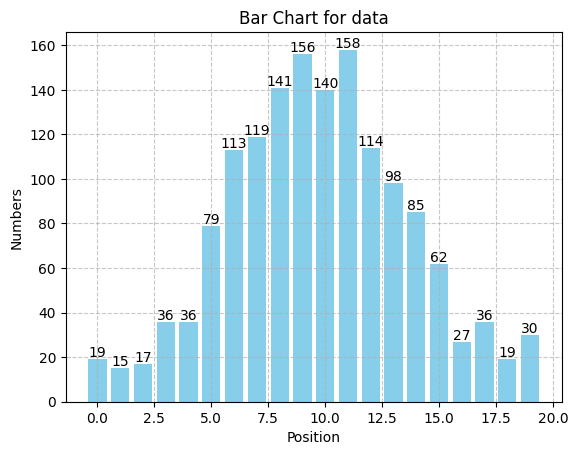

In [25]:
a = [19, 15, 17, 36, 36, 79, 113, 119, 141, 156, 140, 158, 114, 98, 85, 62, 27, 36, 19, 30]
positions = range(len(a))

plt.bar(positions, a, color='skyblue')
plt.title('Bar Chart for data')
plt.xlabel('Position')
plt.ylabel('Numbers')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(a):
    plt.text(i, v + 1, str(v), ha='center')
plt.show()

ValueError: Invalid format specifier